In [126]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:\\Users\\hrith\\Desktop\\Data_science_ml\\iot_safety_dataset_136789_updated.csv")  # Replace with actual filename

# Display basic info
print("Dataset Information:")
print(df.info())

# Display first few rows
df.head()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136789 entries, 0 to 136788
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   humidity          136789 non-null  float64
 1   temperature       136789 non-null  float64
 2   distance          136789 non-null  float64
 3   mq2               136789 non-null  float64
 4   mq6               136789 non-null  float64
 5   mq135             136789 non-null  float64
 6   acc_x             136789 non-null  float64
 7   acc_y             136789 non-null  float64
 8   acc_z             136789 non-null  float64
 9   fall_detected     136789 non-null  int64  
 10  air_quality_risk  136789 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 11.5+ MB
None


,humidity,temperature,distance,mq2,mq6,mq135,acc_x,acc_y,acc_z,fall_detected,air_quality_risk
0,59.15,15.00,229.92,5766.57,7714.05,813.31,2.08,0.22,1.93,0,High Risk
1,54.00,39.28,18.59,4440.09,3007.55,407.55,-0.20,-1.74,-1.12,0,Moderate Risk
2,67.24,27.85,266.83,2379.75,4216.47,206.32,1.18,2.09,0.53,1,Moderate Risk
3,65.90,37.17,21.40,2982.46,4214.45,492.78,-1.37,0.41,-1.65,0,Moderate Risk
4,24.50,42.64,247.61,1789.99,580.75,150.89,-0.58,2.09,-1.95,0,Safe



Class Distribution of Air Quality Risk:

air_quality_risk
Safe             53610
Moderate Risk    43985
High Risk        39194
Name: count, dtype: int64


C:\Users\hrith\AppData\Local\Temp\ipykernel_4312\2236255061.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_air_quality, x='air_quality_risk', palette='Set2')


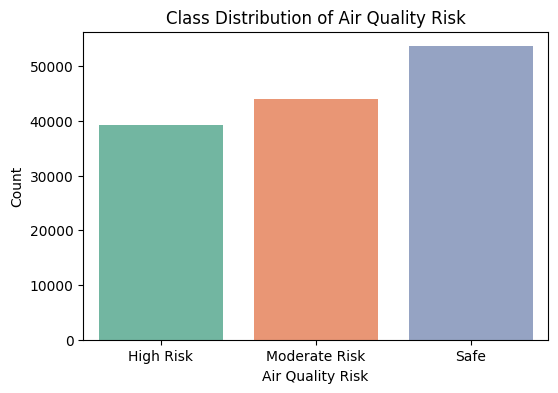

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns


df_air_quality = df[['mq2', 'mq6', 'mq135','air_quality_risk']]

# Check class distribution
print("\nClass Distribution of Air Quality Risk:\n")
print(df_air_quality['air_quality_risk'].value_counts())

# Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df_air_quality, x='air_quality_risk', palette='Set2')
plt.title("Class Distribution of Air Quality Risk")
plt.xlabel("Air Quality Risk")
plt.ylabel("Count")
plt.show()


In [128]:
from sklearn.preprocessing import LabelEncoder

# Encode air_quality_risk labels
label_encoder = LabelEncoder()
df_air_quality['air_quality_risk'] = label_encoder.fit_transform(df_air_quality['air_quality_risk'])

# Show label mapping
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

# Display first few rows
df_air_quality.head()


Label Mapping: {'High Risk': 0, 'Moderate Risk': 1, 'Safe': 2}


C:\Users\hrith\AppData\Local\Temp\ipykernel_4312\956015326.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_air_quality['air_quality_risk'] = label_encoder.fit_transform(df_air_quality['air_quality_risk'])


,mq2,mq6,mq135,air_quality_risk
0,5766.57,7714.05,813.31,0
1,4440.09,3007.55,407.55,1
2,2379.75,4216.47,206.32,1
3,2982.46,4214.45,492.78,1
4,1789.99,580.75,150.89,2


# Train-Test Split

In [129]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_air_quality[['mq2', 'mq6', 'mq135']]
y = df_air_quality['air_quality_risk']

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42, stratify=y)

# Print dataset shapes
print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")


Training set size: (75233, 3), Testing set size: (61556, 3)


# Train Logistic Regression Model

c:\Users\hrith\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


🔹 Accuracy (Logistic Regression): 0.9070

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92     17638
           1       0.90      0.88      0.89     19793
           2       0.90      0.93      0.91     24125

    accuracy                           0.91     61556
   macro avg       0.91      0.91      0.91     61556
weighted avg       0.91      0.91      0.91     61556



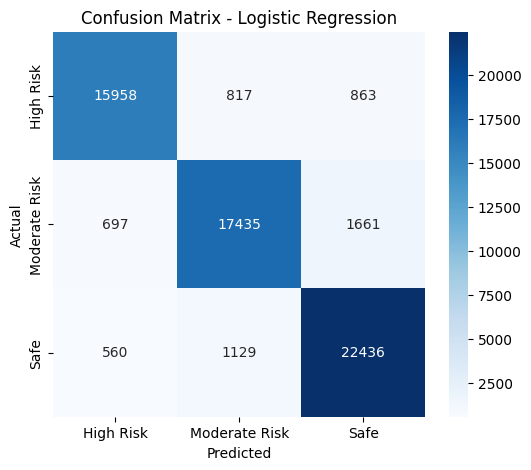

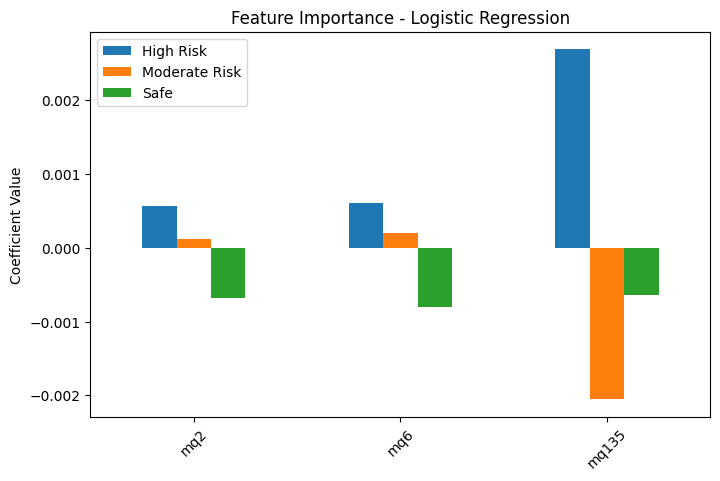

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train Logistic Regression model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log = log_reg.predict(X_test)

# Evaluate the model
accuracy_log = accuracy_score(y_test, y_pred_log)
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
class_report_log = classification_report(y_test, y_pred_log)

# Print accuracy
print(f"🔹 Accuracy (Logistic Regression): {accuracy_log:.4f}")

# Print Classification Report
print("\n🔹 Classification Report:\n", class_report_log)

# 📌 Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# 📌 Feature Importance (Coefficients Analysis)
coefficients = pd.DataFrame(log_reg.coef_.T, index=X_train.columns, columns=['High Risk', 'Moderate Risk', 'Safe'])
coefficients.plot(kind='bar', figsize=(8,5), title="Feature Importance - Logistic Regression")
plt.xticks(rotation=45)
plt.ylabel("Coefficient Value")
plt.show()


C:\Users\hrith\AppData\Local\Temp\ipykernel_4312\2198295453.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_air_quality['air_quality_risk_encoded'] = df_air_quality['air_quality_risk']


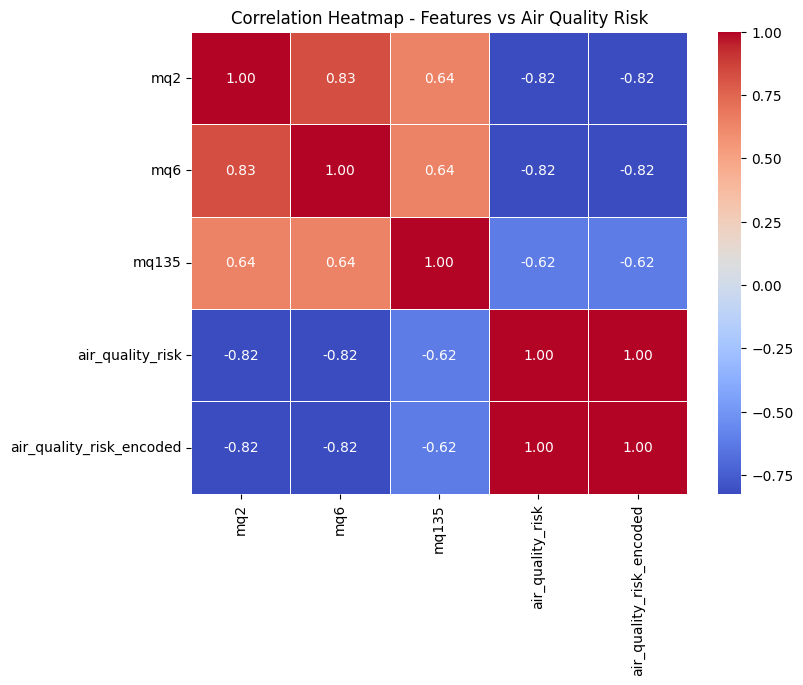

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Encode categorical target variable
df_air_quality['air_quality_risk_encoded'] = df_air_quality['air_quality_risk']

# Compute correlation matrix
corr_matrix = df_air_quality.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap - Features vs Air Quality Risk")
plt.show()


# random forest

In [132]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest
rf_clf = RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
rf_clf.fit(X_train, y_train)


# Predictions
y_pred_rf = rf_clf.predict(X_test)

# Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f"🔹 Accuracy (Random Forest): {accuracy_rf:.4f}")
print("\n🔹 Confusion Matrix:\n", conf_matrix_rf)
print("\n🔹 Classification Report:\n", class_report_rf)


🔹 Accuracy (Random Forest): 0.9119

🔹 Confusion Matrix:
 [[15989   795   854]
 [  636 17677  1480]
 [  558  1102 22465]]

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92     17638
           1       0.90      0.89      0.90     19793
           2       0.91      0.93      0.92     24125

    accuracy                           0.91     61556
   macro avg       0.91      0.91      0.91     61556
weighted avg       0.91      0.91      0.91     61556



# xg boost

🔹 Accuracy (XGBoost): 0.9131

🔹 Confusion Matrix:
 [[16017   770   851]
 [  644 17723  1426]
 [  559  1101 22465]]


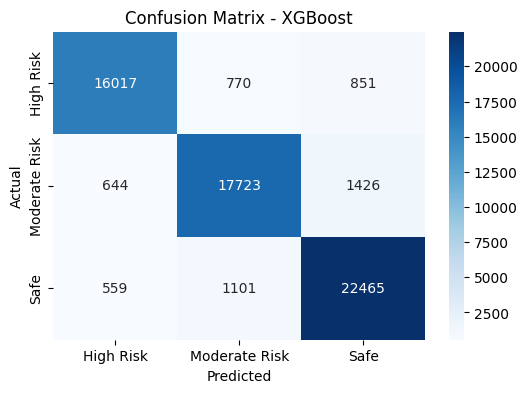

C:\Users\hrith\AppData\Local\Temp\ipykernel_4312\2230288332.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="Blues")


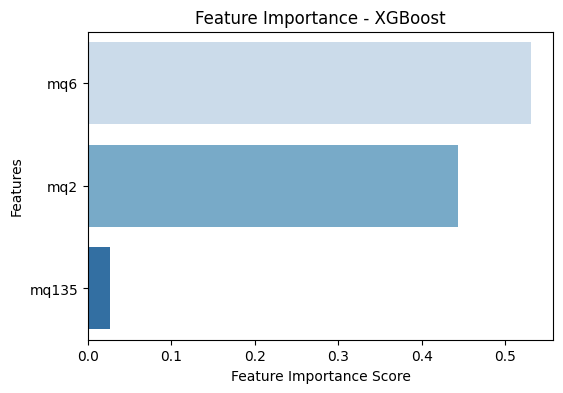

<Figure size 800x500 with 0 Axes>

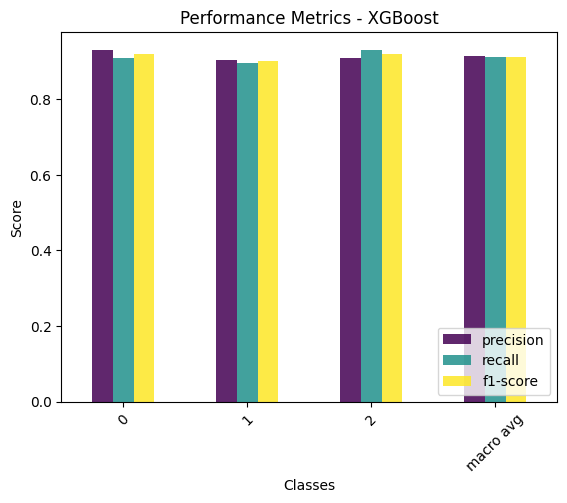

C:\Users\hrith\AppData\Local\Temp\ipykernel_4312\2230288332.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=df_air_quality['mq2'], ax=axes[0], palette="Blues")
C:\Users\hrith\AppData\Local\Temp\ipykernel_4312\2230288332.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=df_air_quality['mq6'], ax=axes[1], palette="Greens")
C:\Users\hrith\AppData\Local\Temp\ipykernel_4312\2230288332.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=df_air_quality['mq135'], ax=axes[2], palette="Reds")


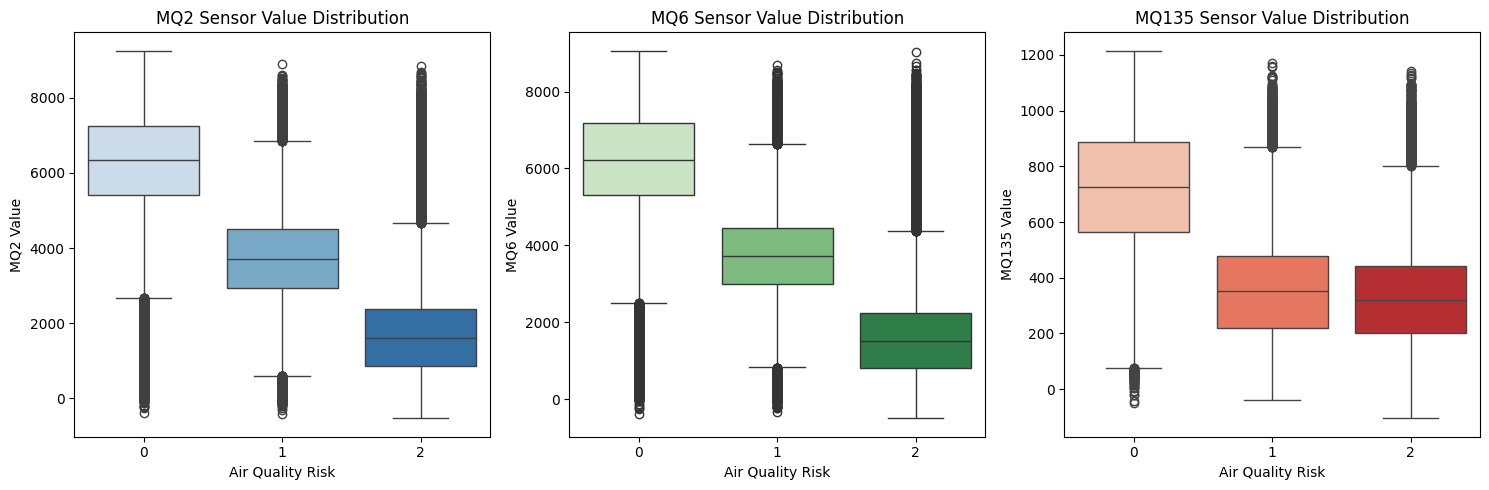

In [133]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 📌 1️⃣ Train XGBoost Model
xgb_clf = XGBClassifier(n_estimators=50, max_depth=5, learning_rate=0.1, reg_lambda=1, reg_alpha=0.5, random_state=42)
xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_test)

# 📌 2️⃣ Evaluation Metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)

# Print Report
print(f"🔹 Accuracy (XGBoost): {accuracy_xgb:.4f}")
print("\n🔹 Confusion Matrix:\n", conf_matrix_xgb)

# 📌 3️⃣ **Confusion Matrix Heatmap**
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

# 📌 4️⃣ **Feature Importance Bar Chart**
feature_importance = xgb_clf.feature_importances_
importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": feature_importance}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="Blues")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - XGBoost")
plt.show()

# 📌 5️⃣ **Performance Metrics Bar Chart**
metrics_df = pd.DataFrame(class_report_xgb).T.iloc[:-1, :-1]  # Remove support column
metrics_df = metrics_df.drop(index="accuracy")  # Remove accuracy row

plt.figure(figsize=(8, 5))
metrics_df.plot(kind="bar", colormap="viridis", alpha=0.85)
plt.title("Performance Metrics - XGBoost")
plt.xlabel("Classes")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.show()

# 📌 6️⃣ **Distribution of Sensor Values for Each Class**
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(x=y, y=df_air_quality['mq2'], ax=axes[0], palette="Blues")
axes[0].set_title("MQ2 Sensor Value Distribution")
axes[0].set_xlabel("Air Quality Risk")
axes[0].set_ylabel("MQ2 Value")

sns.boxplot(x=y, y=df_air_quality['mq6'], ax=axes[1], palette="Greens")
axes[1].set_title("MQ6 Sensor Value Distribution")
axes[1].set_xlabel("Air Quality Risk")
axes[1].set_ylabel("MQ6 Value")

sns.boxplot(x=y, y=df_air_quality['mq135'], ax=axes[2], palette="Reds")
axes[2].set_title("MQ135 Sensor Value Distribution")
axes[2].set_xlabel("Air Quality Risk")
axes[2].set_ylabel("MQ135 Value")

plt.tight_layout()
plt.show()


# light gbm

In [134]:
from lightgbm import LGBMClassifier

# Initialize and train LightGBM
lgbm_clf = LGBMClassifier(n_estimators=50, max_depth=5, learning_rate=0.1, reg_lambda=1, reg_alpha=0.5, random_state=42)
lgbm_clf.fit(X_train, y_train)

# Predictions
y_pred_lgbm = lgbm_clf.predict(X_test)

# Evaluation
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
class_report_lgbm = classification_report(y_test, y_pred_lgbm)

print(f"🔹 Accuracy (LightGBM): {accuracy_lgbm:.4f}")
print("\n🔹 Confusion Matrix:\n", conf_matrix_lgbm)
print("\n🔹 Classification Report:\n", class_report_lgbm)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000868 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 75233, number of used features: 3
[LightGBM] [Info] Start training from score -1.249936
[LightGBM] [Info] Start training from score -1.134568
[LightGBM] [Info] Start training from score -0.936708
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

# Support Vector Machine (SVM - RBF Kernel)

🔹 Accuracy (SVM - RBF Kernel): 0.9129

🔹 Confusion Matrix:
 [[15986   798   854]
 [  623 17698  1472]
 [  558  1056 22511]]

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92     17638
           1       0.91      0.89      0.90     19793
           2       0.91      0.93      0.92     24125

    accuracy                           0.91     61556
   macro avg       0.91      0.91      0.91     61556
weighted avg       0.91      0.91      0.91     61556



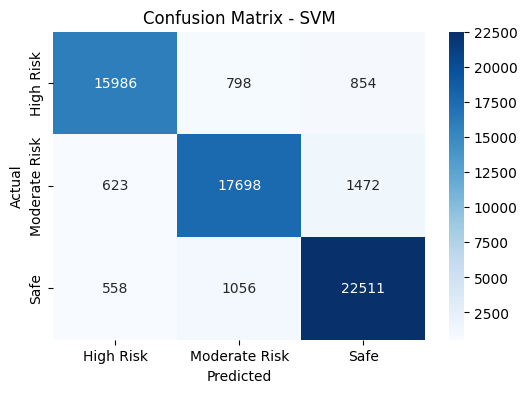

In [135]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train SVM
svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_clf.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_clf.predict(X_test)

# Evaluation
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

print(f"🔹 Accuracy (SVM - RBF Kernel): {accuracy_svm:.4f}")
print("\n🔹 Confusion Matrix:\n", conf_matrix_svm)
print("\n🔹 Classification Report:\n", class_report_svm)

# 📌 Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()


# k-Nearest Neighbors (KNN)

🔹 Accuracy (KNN - 5 Neighbors): 0.9087

🔹 Confusion Matrix:
 [[15994   793   851]
 [  706 17634  1453]
 [  597  1219 22309]]

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92     17638
           1       0.90      0.89      0.89     19793
           2       0.91      0.92      0.92     24125

    accuracy                           0.91     61556
   macro avg       0.91      0.91      0.91     61556
weighted avg       0.91      0.91      0.91     61556



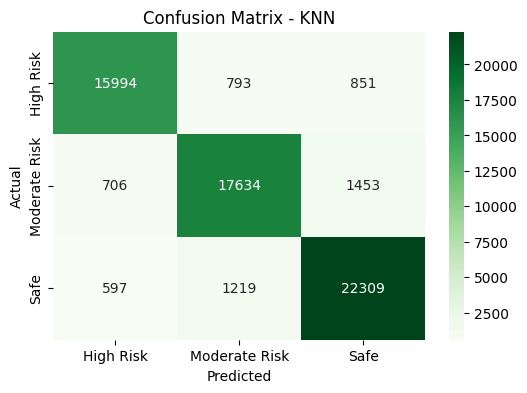

In [136]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train KNN
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_clf.predict(X_test)

# Evaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

print(f"🔹 Accuracy (KNN - 5 Neighbors): {accuracy_knn:.4f}")
print("\n🔹 Confusion Matrix:\n", conf_matrix_knn)
print("\n🔹 Classification Report:\n", class_report_knn)

# 📌 Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()


#  Naïve Bayes (GaussianNB)

🔹 Accuracy (Naïve Bayes): 0.9105

🔹 Confusion Matrix:
 [[16032   731   875]
 [  681 17318  1794]
 [  564   865 22696]]

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92     17638
           1       0.92      0.87      0.89     19793
           2       0.89      0.94      0.92     24125

    accuracy                           0.91     61556
   macro avg       0.91      0.91      0.91     61556
weighted avg       0.91      0.91      0.91     61556



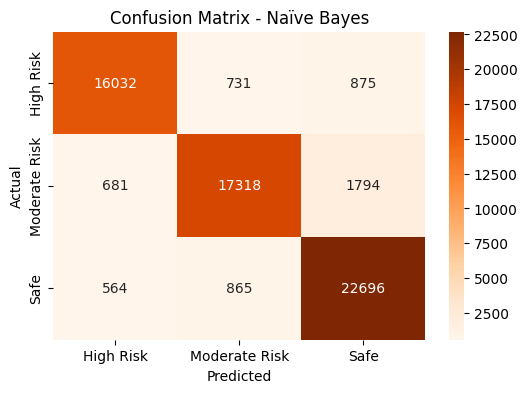

In [137]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train Naïve Bayes
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

# Predictions
y_pred_nb = nb_clf.predict(X_test)

# Evaluation
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
class_report_nb = classification_report(y_test, y_pred_nb)

print(f"🔹 Accuracy (Naïve Bayes): {accuracy_nb:.4f}")
print("\n🔹 Confusion Matrix:\n", conf_matrix_nb)
print("\n🔹 Classification Report:\n", class_report_nb)

# 📌 Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Oranges', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naïve Bayes")
plt.show()


# Gradient Boosting Machine (GBM)


🔹 Accuracy (Gradient Boosting Machine): 0.9130

🔹 Confusion Matrix:
 [[16006   782   850]
 [  647 17751  1395]
 [  558  1122 22445]]

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92     17638
           1       0.90      0.90      0.90     19793
           2       0.91      0.93      0.92     24125

    accuracy                           0.91     61556
   macro avg       0.91      0.91      0.91     61556
weighted avg       0.91      0.91      0.91     61556



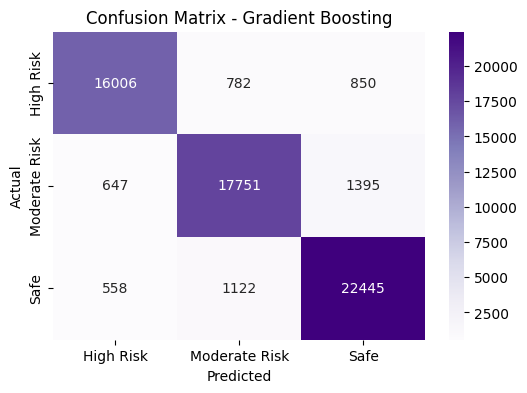

C:\Users\hrith\AppData\Local\Temp\ipykernel_4312\4230333154.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_gbm, palette="Purples")


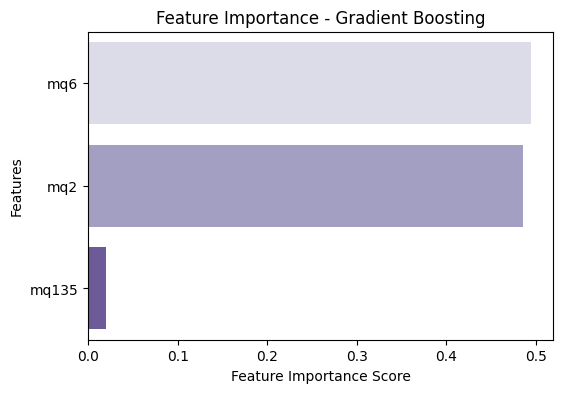

In [138]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train Gradient Boosting
gbm_clf = GradientBoostingClassifier(n_estimators=50, max_depth=5, learning_rate=0.1, random_state=42)
gbm_clf.fit(X_train, y_train)

# Predictions
y_pred_gbm = gbm_clf.predict(X_test)

# Evaluation
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
class_report_gbm = classification_report(y_test, y_pred_gbm)

print(f"🔹 Accuracy (Gradient Boosting Machine): {accuracy_gbm:.4f}")
print("\n🔹 Confusion Matrix:\n", conf_matrix_gbm)
print("\n🔹 Classification Report:\n", class_report_gbm)

# 📌 Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_gbm, annot=True, fmt='d', cmap='Purples', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

# 📌 Feature Importance
feature_importance_gbm = pd.DataFrame({"Feature": X.columns, "Importance": gbm_clf.feature_importances_}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x="Importance", y="Feature", data=feature_importance_gbm, palette="Purples")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - Gradient Boosting")
plt.show()
